### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the charts I create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Accessing EnvFile for path

%run EnvFile.ipynb

Stored 'path' (str)


In [5]:
df = pd.read_csv("SaaS-Sales.csv")

### 2. Exploring Relationships

### Correlations:

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [7]:
num_df = df[['Sales' ,'Quantity', 'Discount', 'Profit']]

In [8]:
# Create a correlation matrix using pandas

num_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

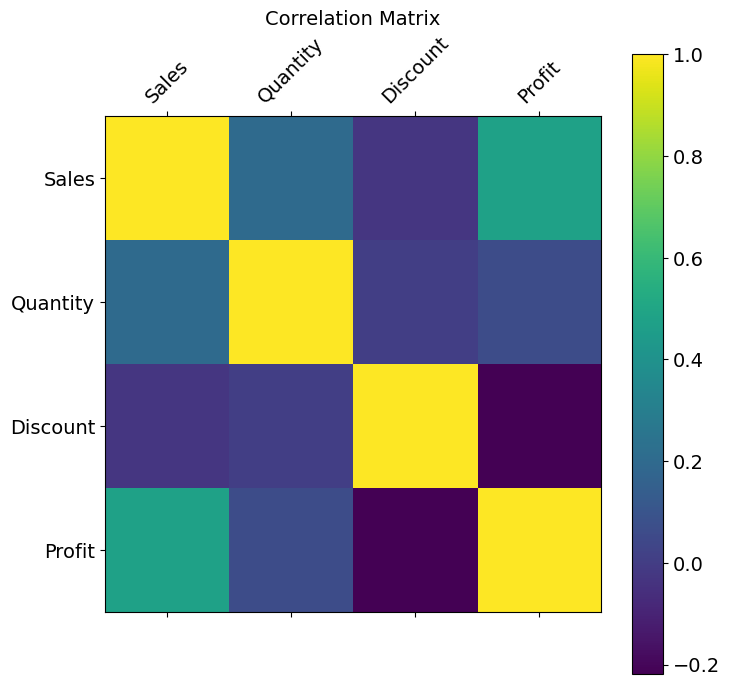

In [9]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(num_df.corr(), fignum = f.number) # type of plot
plt.xticks(range(num_df.shape[1]), num_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(num_df.shape[1]), num_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

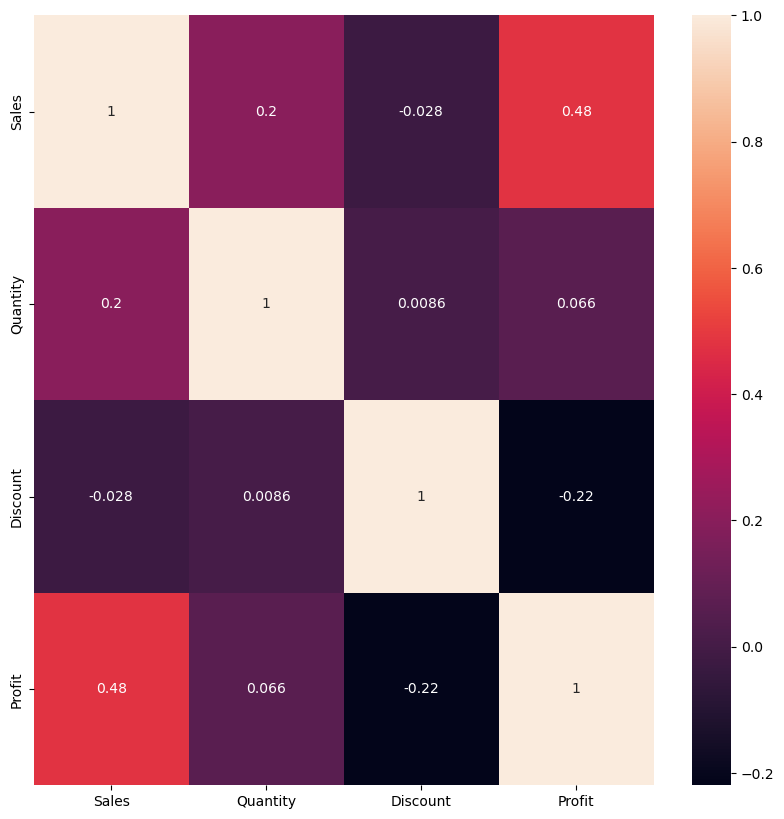

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(num_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### 1. Sales and Quantity has a weak postiive relationship (0.2) i.e., when sales increases, quantity increase and vice versa.
#### 2. Sales and Discount has a weak negative relationship (-0.028) i.e., when sales increases, discount decrease and vice versa. 
#### 3. Sales and Profit has a moderate positive relationship (0.48) i.e., when sales increases, profit increase and vice versa.
#### 4. Quantity and Discount has a weak positive relationship (0.0086) i.e, when quantity increases, discount increase and vice versa.
#### 5. Quanity and Profit has a weak positive relationship (0.066) i.e, when quantity increases, profit increase and vice versa.
#### 6. Discount and Profit has a weak negative relationship (-0.22) i.e., when discount increases, profit decrease and vice versa. 

### Scatterplots:

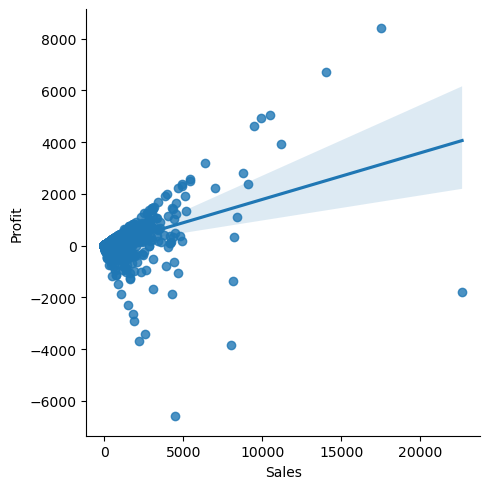

In [11]:
# Create a scatterplot for the "Sales" and "Profit" columns in seaborn

sns.lmplot(x = 'Sales', y = 'Profit', data = num_df)

#### As sales increase, profit also increases. But since it is moderately correlated (0.48), it makes sense that the relationship isn't perfectly linear. Let's examine.
#### The profit is split into positive and negative (loss) for most of the sales.
#### There is also an outlier at the highest sale whose profit is negative. It would be worthwhile to investigate it further. It could be probably combined with higher discount which could have resulted in negative profit (loss). But it has to be analysed and confirmed. 

### Pair Plots:

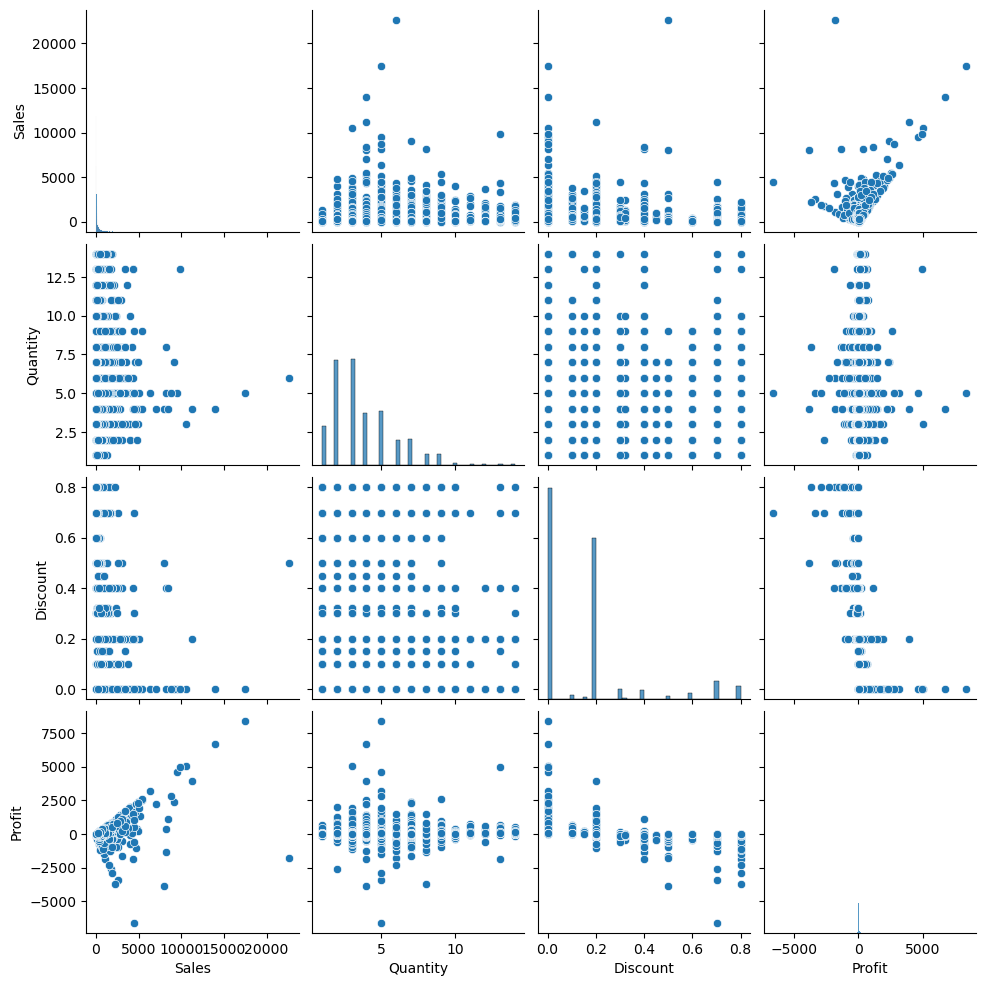

In [12]:
# Create a pair plot 

g = sns.pairplot(num_df)

### Categorical Plots:

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [14]:
df.loc[df['Profit'] > 0, 'Profit Category'] = 'Profit'
df.loc[df['Profit'] < 0, 'Profit Category'] = 'Loss'
df.loc[df['Profit'] == 0, 'Profit Category'] = 'Neutral'

In [15]:
df['Profit Category'].value_counts(dropna = False)

Profit     8058
Loss       1871
Neutral      65
Name: Profit Category, dtype: int64

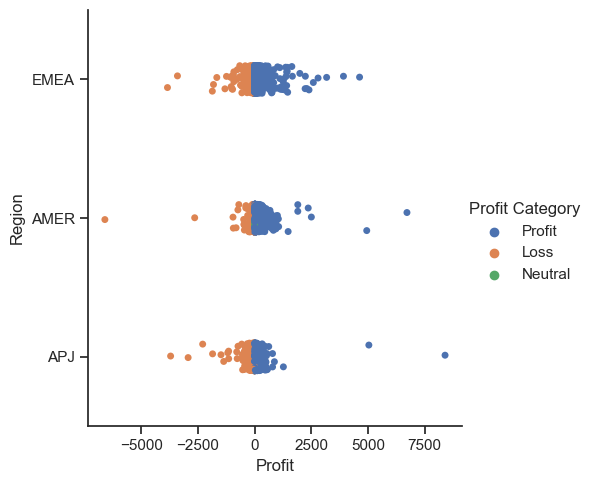

In [16]:
# Create a categorical plot in seaborn using the Region as a category

sns.set(style="ticks")
g = sns.catplot(x="Profit", y="Region", hue="Profit Category", data=df)

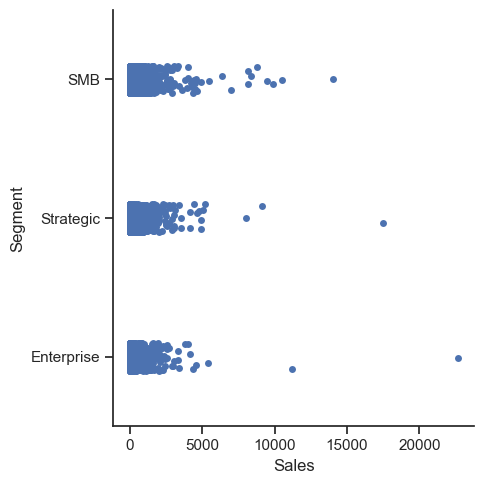

In [19]:
# Create a categorical plot in seaborn

sns.set(style="ticks")
prof_seg = sns.catplot(x="Sales", y="Segment", data=df)

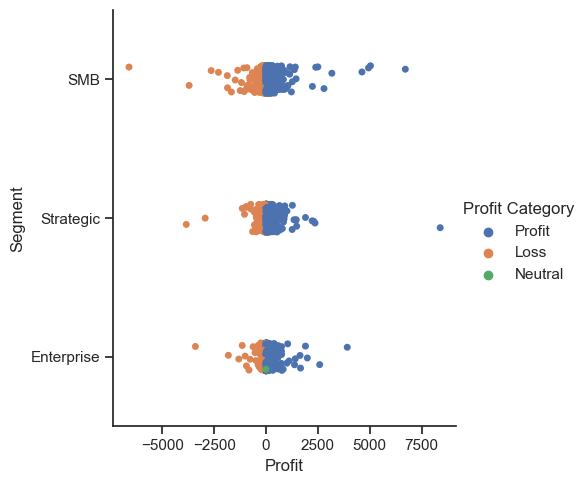

In [17]:
# Create a categorical plot in seaborn using the Profit as a category

sns.set(style="ticks")
prof_seg = sns.catplot(x="Profit", y="Segment", hue="Profit Category", data=df)

#### How do different customer segments contribute to sales and profitability? Are there any segments that stand out in terms of revenue generation?

The highest sale is from Enterprise followed by Strategic and SMB segment. 
The highest profit is from Strategic followed by SMB and Enterprise segment.

#### Hypothesis: The profitability of products varies depending on the customer segment they are sold to.
#### • Null Hypothesis (H0): There is no significant difference in profitability between different customer segments.
#### • Alternative Hypothesis (H1): There is a significant difference in profitability between different customer segments.


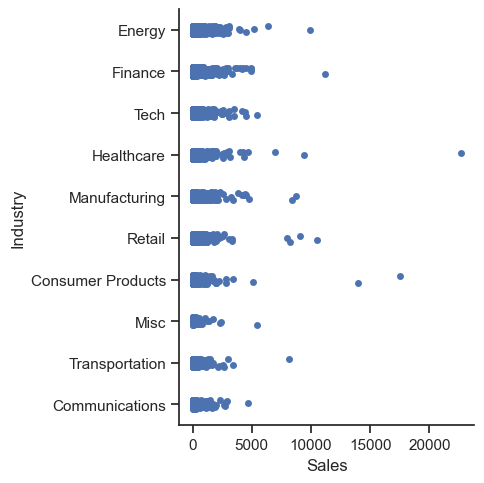

In [18]:
# Create a categorical plot in seaborn

sns.set(style="ticks")
g = sns.catplot(x="Sales", y="Industry", data=df)

#### Hypothesis: Customers from certain industries generate higher average sales than customers from other industries.
#### • Null Hypothesis (H0): There is no significant difference in average sales between industries.
#### • Alternative Hypothesis (H1): There is a significant difference in average sales between industries.

#### Hypothesis: The discount amount offered negatively impacts the overall profitability of the company.
#### • Null Hypothesis (H0): There is no significant impact of the discount amount on overall profitability.
#### • Alternative Hypothesis (H1): There is a significant negative impact of the discount amount on overall profitability.